<a href="https://colab.research.google.com/github/Lavan1999/Project-15_HandSignDigits/blob/main/Hand_Sign_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data set
x_l = np.load('/content/drive/MyDrive/Sign-language-digits-dataset/X.npy')
Y_l = np.load('/content/drive/MyDrive/Sign-language-digits-dataset/Y.npy')

In [ ]:
'''
0 = [205:409]
1 = [823:1028]
2 = [1650:1855]
3 = [1444:1649]
4 = [1237:1443]
5 = [1856:2061]
6 = [616:822]
7 = [410:615]
8 = [1029:1236]
9 = [0:205]'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the .npy file
images = np.load('/content/drive/MyDrive/Sign-language-digits-dataset/X.npy')

# Step 2: Check the shape of the loaded data
print("Shape of images array:", images.shape)

# Step 3: Display all the images
for i in range(images.shape[0]):
    plt.imshow(images[i], cmap='gray')  # Use cmap='gray' if the images are grayscale
    plt.title(f'Image {i+1}')
    plt.axis('off')  # Turn off the axis
    plt.show()


In [ ]:
print(Y_l)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


(-0.5, 63.5, 63.5, -0.5)

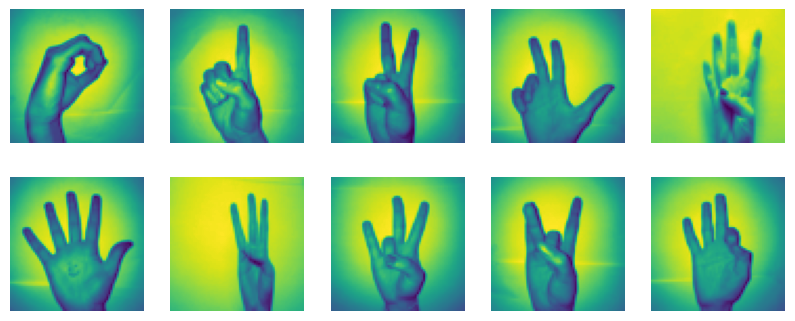

In [ ]:
img_size = 64
# Display images in a 2x5 grid
plt.figure(figsize=(10, 4))
plt.subplot(2, 5, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 3)
plt.imshow(x_l[1650].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 4)
plt.imshow(x_l[1444].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 5)
plt.imshow(x_l[1238].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 6)
plt.imshow(x_l[1856].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 7)
plt.imshow(x_l[616].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 8)
plt.imshow(x_l[410].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 9)
plt.imshow(x_l[1029].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(2, 5, 10)
plt.imshow(x_l[1].reshape(img_size, img_size))
plt.axis('off')

In [ ]:
# Preprocess the data
X_l = x_l / 255.0  # Normalize the images (if they are pixel values in the range 0-255)
Y_l = np.argmax(Y_l, axis=1)  # Convert one-hot encoded labels to integers if necessary

In [ ]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_l, Y_l, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
# Build a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,360,160 (28.08 MB)

 Trainable params: 2,453,386 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,906,774 (18.72 MB)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 594ms/step - accuracy: 0.1914 - loss: 2.2184 - val_accuracy: 0.6032 - val_loss: 1.2012
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 305ms/step - accuracy: 0.6814 - loss: 0.9778 - val_accuracy: 0.8065 - val_loss: 0.5706
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - accuracy: 0.8190 - loss: 0.5827 - val_accuracy: 0.7935 - val_loss: 0.5805
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 339ms/step - accuracy: 0.8432 - loss: 0.4538 - val_accuracy: 0.8645 - val_loss: 0.4159
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.9027 - loss: 0.3379 - val_accuracy: 0.8742 - val_loss: 0.3724
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - accuracy: 0.9211 - loss: 0.2352 - val_accuracy: 0.8935 - val_loss: 0.3089
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 27s 432ms/step - accuracy: 0.9536 - loss: 0.1559 - val_accuracy: 0.9226 - val_loss: 0.2583
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 35s 314ms/step - accuracy: 0.9703 - loss: 0.1163 - val_accu

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9019 - loss: 0.3001
Test accuracy: 0.9225806593894958


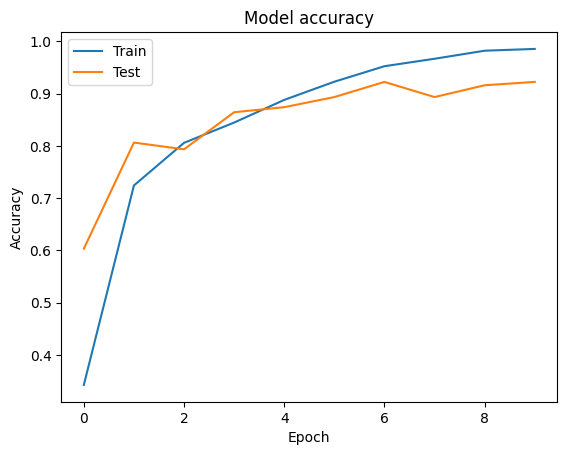

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

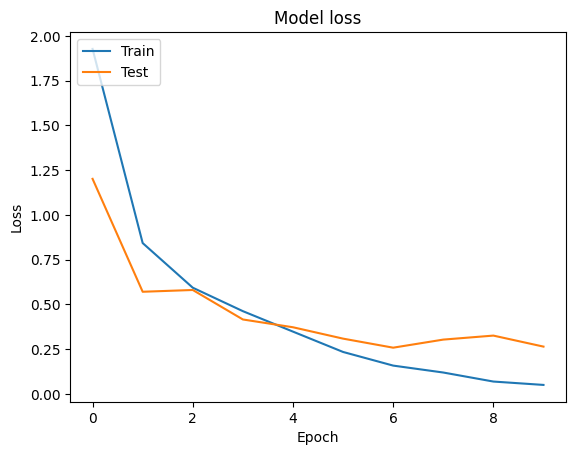

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()